In [1]:
!pip install qiskit qiskit_aer


from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt


def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc


def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc


def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc


def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      



🧩 Task 1 — QFT for 2, 3, and 4 Qubits

🔹 QFT on 2 qubits:
{'01': 268, '11': 266, '10': 231, '00': 259}


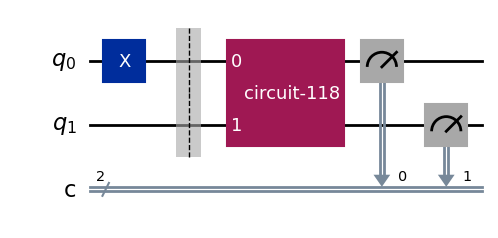


🔹 QFT on 3 qubits:
{'110': 125, '001': 132, '111': 126, '011': 133, '101': 132, '100': 120, '010': 126, '000': 130}


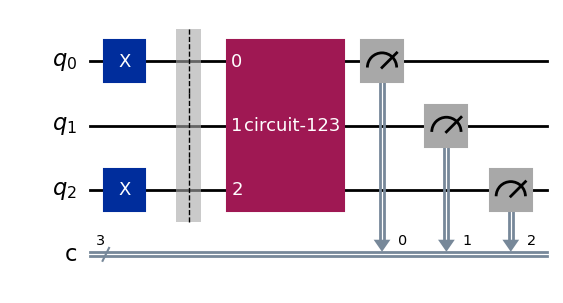


🔹 QFT on 4 qubits:
{'1100': 49, '1011': 69, '1010': 59, '0000': 64, '0010': 61, '0011': 76, '0111': 65, '1111': 61, '0001': 65, '1000': 64, '0110': 78, '1101': 56, '0100': 71, '1001': 67, '0101': 57, '1110': 62}


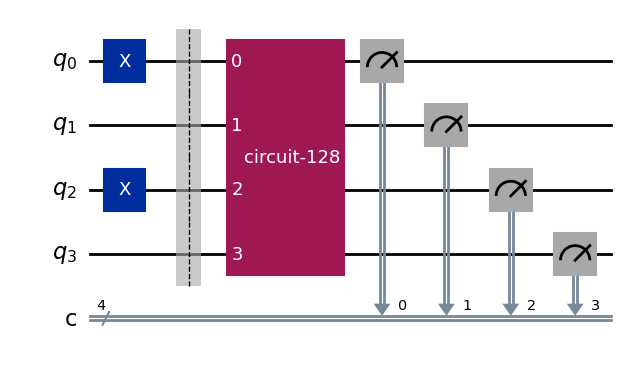


🧩 Task 2 — Inverse QFT (iQFT) Circuit


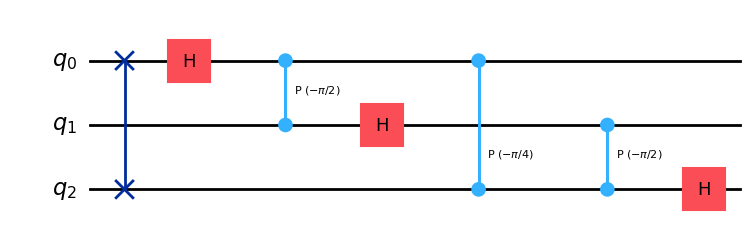


🧩 Task 3 — QFT + Phase Estimation

📏 Phase Estimation Counts:
{'100': 147, '010': 130, '000': 120, '101': 129, '001': 109, '110': 134, '111': 131, '011': 124}


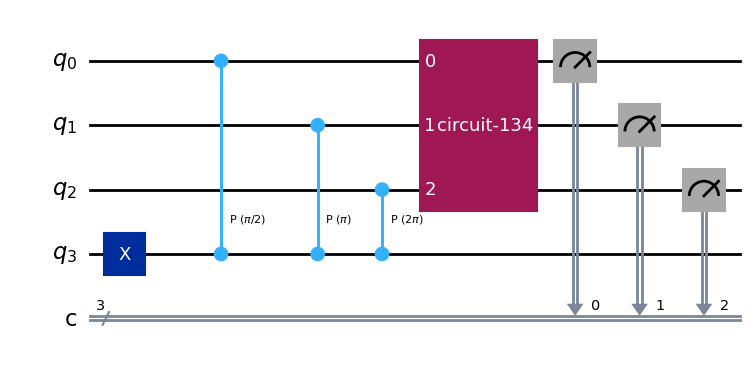


🧩 Task 4 — QFT Measurement of Output States

📊 QFT Measurement Results (Superposition Input):
{'000': 1024}


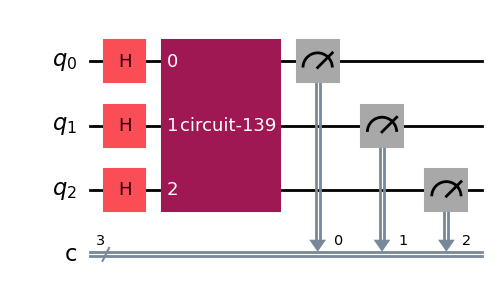


🧩 Task 5 — Circuit Visualization


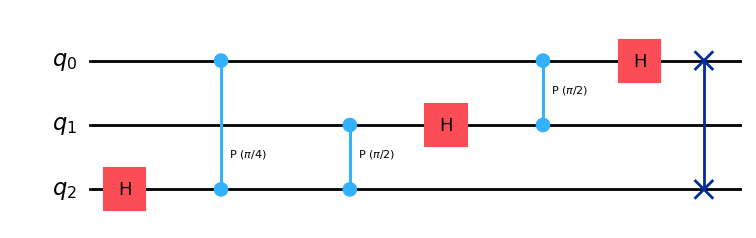

In [5]:
# ===============================================================
# 🧩 Quantum Fourier Transform (QFT) – All Tasks (Labeled Output)
# ===============================================================

!pip install -q qiskit qiskit-aer matplotlib pylatexenc

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# ⚙️ QFT Core Functions
# ---------------------------------------------------------------
def qft_rotations(qc, n):
    """Recursive QFT rotations (Hadamard + controlled phase gates)."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    """Swap qubits to reverse order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    """Build full QFT circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    return qc

def iqft_circuit(n):
    """Build inverse QFT circuit."""
    qc = QuantumCircuit(n)
    swap_registers(qc, n)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / 2 ** (j - k), k, j)
        qc.h(j)
    return qc

# ---------------------------------------------------------------
# 🧩 Task 1 — Vary Number of Qubits (2, 3, 4)
# ---------------------------------------------------------------
print("\n==============================")
print("🧩 Task 1 — QFT for 2, 3, and 4 Qubits")
print("==============================")

def run_qft(n):
    qc = QuantumCircuit(n, n)
    for i in range(0, n, 2):
        qc.x(i)
    qc.barrier()
    qc.append(qft_circuit(n), range(n))
    qc.measure(range(n), range(n))

    sim = AerSimulator()
    result = sim.run(transpile(qc, sim), shots=1024).result()
    counts = result.get_counts()
    print(f"\n🔹 QFT on {n} qubits:")
    print(counts)
    plot_histogram(counts, title=f"Task 1: QFT Output Distribution ({n} Qubits)")
    plt.show()
    display(qc.draw("mpl"))

for n in [2, 3, 4]:
    run_qft(n)

# ---------------------------------------------------------------
# 🧩 Task 2 — Inverse QFT Implementation
# ---------------------------------------------------------------
print("\n==============================")
print("🧩 Task 2 — Inverse QFT (iQFT) Circuit")
print("==============================")

iqft = iqft_circuit(3)
display(iqft.draw("mpl"))

# ---------------------------------------------------------------
# 🧩 Task 3 — Integration with Phase Estimation
# ---------------------------------------------------------------
print("\n==============================")
print("🧩 Task 3 — QFT + Phase Estimation")
print("==============================")

phi = 0.25  # Phase to estimate
n_count = 3
qc_pe = QuantumCircuit(n_count + 1, n_count)
qc_pe.x(n_count)

for q in range(n_count):
    qc_pe.cp(2 * np.pi * phi * (2 ** q), q, n_count)

qc_pe.append(iqft_circuit(n_count), range(n_count))
qc_pe.measure(range(n_count), range(n_count))

sim = AerSimulator()
result_pe = sim.run(transpile(qc_pe, sim), shots=1024).result()
counts_pe = result_pe.get_counts()
print("\n📏 Phase Estimation Counts:")
print(counts_pe)
plot_histogram(counts_pe, title="Task 3: Phase Estimation using QFT")
plt.show()
display(qc_pe.draw("mpl"))

# ---------------------------------------------------------------
# 🧩 Task 4 — Measure Output States
# ---------------------------------------------------------------
print("\n==============================")
print("🧩 Task 4 — QFT Measurement of Output States")
print("==============================")

n4 = 3
qc4 = QuantumCircuit(n4, n4)
qc4.h(range(n4))  # Equal superposition
qc4.append(qft_circuit(n4), range(n4))
qc4.measure(range(n4), range(n4))

sim4 = AerSimulator()
result4 = sim4.run(transpile(qc4, sim4), shots=1024).result()
counts4 = result4.get_counts()
print("\n📊 QFT Measurement Results (Superposition Input):")
print(counts4)
plot_histogram(counts4, title="Task 4: QFT on Superposition Input")
plt.show()
display(qc4.draw("mpl"))

# ---------------------------------------------------------------
# 🧩 Task 5 — Circuit Visualization
# ---------------------------------------------------------------
print("\n==============================")
print("🧩 Task 5 — Circuit Visualization")
print("==============================")

qc_vis = qft_circuit(3)
display(qc_vis.draw("mpl"))
